In [34]:
# %%
# Python standard library
import math
import random

# custom utils
from utils import display_maze
from examples.dense_maze_4x3 import maze

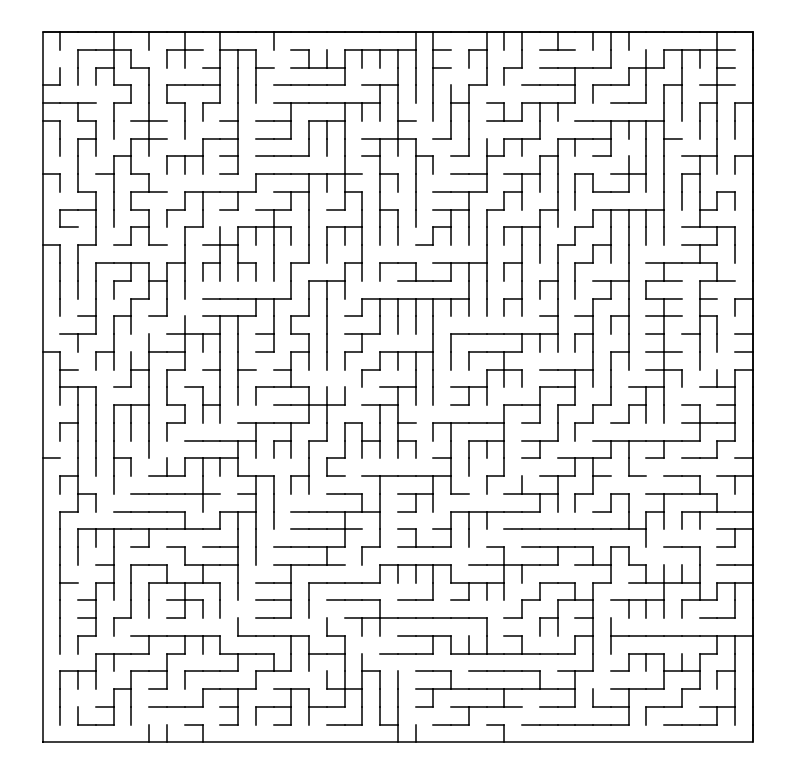

In [74]:
# Votre code ici !
#display_maze(maze)
'''
vertices = set([
    (0,0),
    (0,1),
    (1,0),
    (1,1)
])

edges = set([
    ((0,0), (1,0)),
    ((1,0), (0,0)),
    ((1,1), (1,0)),
    ((1,0), (1,1)),
    ((1,1), (0,1)),
    ((0,1), (1,1))
])

weights = {
    ((0,0), (0,1)):1,
    ((0,1), (0,0)):1
}
'''

#display_maze((vertices,edges,weights))

def full_maze(width, height):
    vertices = set()
    for col in range(width):
        for row in range(height):
            vertices.add((col,row))

    edges = set()
    weights = {}

    return (vertices,edges,weights)
#display_maze(full_maze(10,10))

def empty_maze(width, height):
    vertices = set()
    for col in range(width):
        for row in range(height):
            vertices.add((col,row))

    liens = []
    weights = {}
    for j in range(height):
        for i in range(width - 1):
            liens.append(((i,j),(i+1,j)))
            liens.append(((i+1,j),(i,j)))
    for i in range(width):
        for j in range(height - 1):
            liens.append(((i,j),(i, j+1)))
            liens.append(((i,j+1),(i,j)))
    
    edges = set(liens)
    for edge in edges:
        weights[edge] = 1
    return (vertices, edges, weights)

#display_maze(empty_maze(10,10))

from random import randint
from random import choice

def mymaze(width,height):
    vertices, edges, weights = empty_maze(width, height)
    edges = {edge for edge in edges if (randint(1,4) == 1)}
    weights = {edge: 1 for edge in edges}
    return vertices, edges, weights

#display_maze(mymaze(10,10))

directions = [
    (0, +1),
    (0, -1),
    (+1, 0),
    (-1, 0)
]

def maze(width, height, starting_pt=(0,0)):
    vertices = {(col, row) for col in range(width) for row in range(height)}
    edges = set()
    to_visit = {starting_pt}
    visited = set()
    while len(to_visit) > 0:
        current = choice(list(to_visit))
        col, row = current
        neighbours = {(col +dcol, row +drow) for dcol, drow in directions if (col +dcol, row +drow) in vertices}
        
        candidates = neighbours - visited - to_visit
        
        if len(candidates)>0:
            new = choice(list(candidates))
            edges.add((current, new))
            edges.add((new, current))
            to_visit.add(new)

        if len(candidates) <1:
            visited.add(current)
            to_visit.remove(current)


    weight = {edge: 1 for edge in edges}
    return vertices, edges, weight

display_maze(maze(40,40))







